In [2]:
import gym
import numpy as np


In [4]:
env = gym.make('FrozenLake-v1')

In [5]:
gamma = 0.99
theta = 0.000001

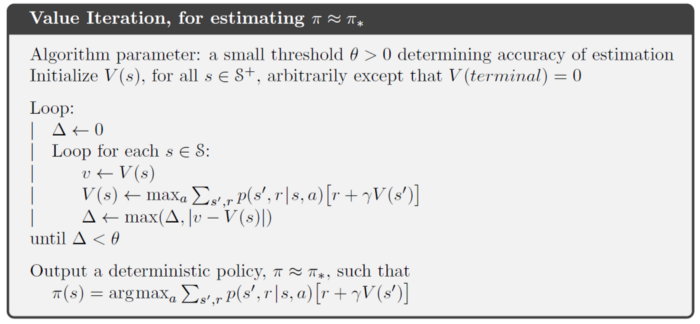

In [6]:
def argmax(env, V, pi, action,s, gamma):
    e = np.zeros(env.env.nA)
    for a in range(env.env.nA):                         # iterate for every action possible 
        q=0
        P = np.array(env.env.P[s][a])                   
        (x,y) = np.shape(P)                             # for Bellman Equation 
        
        for i in range(x):                              # iterate for every possible states
            s_= int(P[i][1])                            # S' - Sprime - possible succesor states
            p = P[i][0]                                 # Transition Probability P(s'|s,a) 
            r = P[i][2]                                 # Reward
            
            q += p*(r+gamma*V[s_])                      # calculate action_ value q(s|a)
            e[a] = q
            
    m = np.argmax(e) 
    action[s]=m                                           # Take index which has maximum value 
    pi[s][m] = 1                                        # update pi(a|s) 

    return pi

In [7]:
def bellman_optimality_update(env, V, s, gamma):  # update the stae_value V[s] by taking 
    pi = np.zeros((env.env.nS, env.env.nA))       # action which maximizes current value
    e = np.zeros(env.env.nA)                       
                                            # STEP1: Find 
    for a in range(env.env.nA):             
        q=0                                 # iterate for all possible action
        P = np.array(env.env.P[s][a])
        (x,y) = np.shape(P)
        
        for i in range(x):
            s_= int(P[i][1])
            p = P[i][0]
            r = P[i][2]
            q += p*(r+gamma*V[s_])
            e[a] = q
            
    m = np.argmax(e)
    pi[s][m] = 1
    
    value = 0
    for a in range(env.env.nA):
        u = 0
        P = np.array(env.env.P[s][a])
        (x,y) = np.shape(P)
        for i in range(x):
            
            s_= int(P[i][1])
            p = P[i][0]
            r = P[i][2]
            
            u += p*(r+gamma*V[s_])
            
        value += pi[s,a] * u
  
    V[s]=value
    return V[s]


In [8]:
def value_iteration(env, gamma, theta):
    V = np.zeros(env.env.nS)                                       # initialize v(0) to arbitory value, my case "zeros"
    while True:
        delta = 0
        for s in range(env.env.nS):                       # iterate for all states
            v = V[s]
            bellman_optimality_update(env, V, s, gamma)   # update state_value with bellman_optimality_update
            delta = max(delta, abs(v - V[s]))             # assign the change in value per iteration to delta  
        if delta < theta:                                       
            break                                         # if change gets to negligible 
                                                          # --> converged to optimal value         
    pi = np.zeros((env.env.nS, env.env.nA)) 
    action = np.zeros((env.env.nS))
    for s in range(env.env.nS):
        pi = argmax(env, V, pi,action, s, gamma)         # extract optimal policy using action value 
        
    return V, pi,action                                          # optimal value funtion, optimal policy

In [10]:
V, pi, action = value_iteration(env, gamma, theta)
# tools.plot(V,pi)

In [11]:
a= np.reshape(action,(4,4))
print(a) 

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


In [12]:
e=0
for i_episode in range(100):
    c = env.reset()
    for t in range(10000):
        c, reward, done, info = env.step(action[c])
        if done:
            if reward == 1:
                e +=1
            break
print(" agent succeeded to reach goal {} out of 100 Episodes using this policy ".format(e+1))
env.close()

 agent succeeded to reach goal 70 out of 100 Episodes using this policy 
